In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
# 讀取固定的類別順序
genres = read_json('../orderdListGenres.json')
print(len(genres), genres)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [4]:
df = pd.read_csv('./csv/filename2genreMat_2018.csv')
df

,id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0328810,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,tt10005184,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt10017502,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,tt10043732,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt10048096,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,tt9866700,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1401,tt9879080,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1402,tt9891764,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,tt9904014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
genreCount = pd.DataFrame(df.sum(axis = 0), columns = ['count'])
genreCount = genreCount.drop('id')

In [6]:
genreCount = genreCount.sort_values(by = 'count', ascending = True)
genreCount

,count
Documentary,90
Sci-Fi,94
Western,97
Sport,97
Mystery,97
War,98
Animation,100
Fantasy,105
Music,107
Family,117


In [7]:
# init 
total = {}
for g in genreCount.index:
    total[g] = 0
print(total)
print(df.shape)

{'Documentary': 0, 'Sci-Fi': 0, 'Western': 0, 'Sport': 0, 'Mystery': 0, 'War': 0, 'Animation': 0, 'Fantasy': 0, 'Music': 0, 'Family': 0, 'History': 0, 'Biography': 0, 'Crime': 0, 'Romance': 0, 'Adventure': 0, 'Horror': 0, 'Thriller': 0, 'Action': 0, 'Comedy': 0, 'Drama': 0}
(1405, 21)


In [8]:
from IPython.display import display
trainingset = pd.DataFrame()
testingset = pd.DataFrame()

for g, row in genreCount.iterrows():
    print('current DF:', df.shape)
    print(g)
    
    remain = int(90 - total[g])
    
    newdf = df.loc[df[g] == 1]
    df = df.drop(newdf.index)
    print(newdf.shape)
#     display(newdf)
    
    if remain > 0:
        try:
            traindf = newdf.sample(n = remain)
        except ValueError:
            traindf = newdf
    else:
        testingset = testingset.append(newdf)
        continue
    
#     display(traindf)

    print(traindf.shape)
    trainingset = trainingset.append(traindf)
    testingset = testingset.append(newdf.drop(traindf.index))
    
    countdf = pd.DataFrame(traindf.sum(axis = 0), columns = ['count']).drop('id')
#     display(countdf)
    
    for genre, row in countdf.iterrows():
        total[genre] += row['count']
        
    print(total)
    
    print('==================================================')

current DF: (1405, 21)
Documentary
(90, 21)
(90, 21)
{'Documentary': 90, 'Sci-Fi': 0, 'Western': 0, 'Sport': 3, 'Mystery': 1, 'War': 1, 'Animation': 0, 'Fantasy': 0, 'Music': 9, 'Family': 5, 'History': 7, 'Biography': 15, 'Crime': 4, 'Romance': 0, 'Adventure': 3, 'Horror': 0, 'Thriller': 0, 'Action': 0, 'Comedy': 2, 'Drama': 10}
current DF: (1315, 21)
Sci-Fi
(94, 21)
(90, 21)
{'Documentary': 90, 'Sci-Fi': 90, 'Western': 3, 'Sport': 3, 'Mystery': 9, 'War': 3, 'Animation': 4, 'Fantasy': 9, 'Music': 11, 'Family': 8, 'History': 7, 'Biography': 15, 'Crime': 5, 'Romance': 1, 'Adventure': 18, 'Horror': 20, 'Thriller': 15, 'Action': 18, 'Comedy': 6, 'Drama': 39}
current DF: (1221, 21)
Western
(94, 21)
(87, 21)
{'Documentary': 90, 'Sci-Fi': 90, 'Western': 90, 'Sport': 3, 'Mystery': 13, 'War': 3, 'Animation': 4, 'Fantasy': 12, 'Music': 11, 'Family': 10, 'History': 12, 'Biography': 18, 'Crime': 14, 'Romance': 5, 'Adventure': 35, 'Horror': 27, 'Thriller': 19, 'Action': 38, 'Comedy': 16, 'Drama': 6

In [9]:
total

{'Documentary': 90,
 'Sci-Fi': 90,
 'Western': 90,
 'Sport': 90,
 'Mystery': 90,
 'War': 90,
 'Animation': 90,
 'Fantasy': 90,
 'Music': 90,
 'Family': 90,
 'History': 90,
 'Biography': 90,
 'Crime': 90,
 'Romance': 90,
 'Adventure': 97,
 'Horror': 90,
 'Thriller': 90,
 'Action': 114,
 'Comedy': 149,
 'Drama': 442}

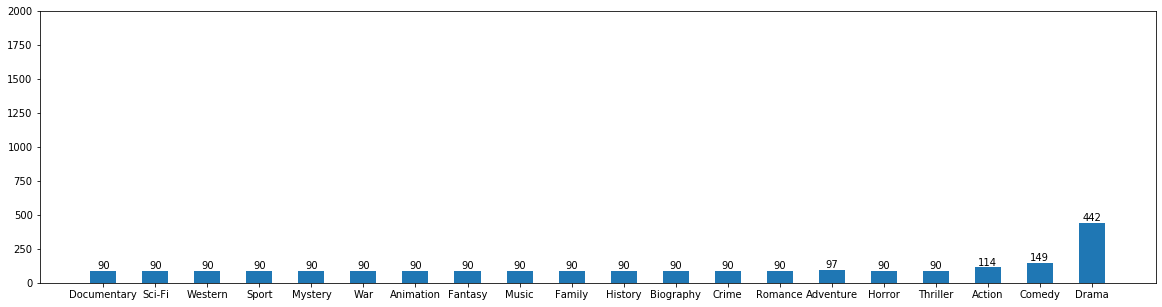

In [10]:
import matplotlib.pyplot as plt

names = list(total.keys())
values = list(total.values())

plt.figure(figsize=(20, 5))
plt.ylim(0, 2000) 
plt.bar(names, values, align='center', width=0.5)

for a,b in zip(names, values):  
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    
plt.show()

In [11]:
trainingset.to_csv('./csv/trainMatrix.csv', index = 0)
trainingset

,id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1324,tt9604418,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1350,tt9648786,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1235,tt9382590,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,tt9504436,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,tt9848240,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,tt8236848,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
638,tt7866714,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
793,tt8364418,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
947,tt8708180,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
testingset.to_csv('./csv/validMatrix.csv', index = 0)
testingset

,id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
242,tt5611432,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
406,tt6870808,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
664,tt7961060,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
671,tt7978752,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
58,tt2396489,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tt9740064,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1375,tt9747894,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1386,tt9799044,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1387,tt9800602,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
